Breast Cancer Prediction using LogReg and EDA

By Yoihen Elangbam

In [30]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

df['target'] = cancer_data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [45]:
for column in df.columns:
  print(column)

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension
target


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df[cancer_data.feature_names])

# Target variable
y = df['target']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


print("Classification Report:\n", classification_report(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 92.98%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        37
           1       0.91      1.00      0.95        77

    accuracy                           0.93       114
   macro avg       0.95      0.89      0.91       114
weighted avg       0.94      0.93      0.93       114

Confusion Matrix:
 [[29  8]
 [ 0 77]]


In [35]:
import numpy as np

# Example of testing with a new sample (scaled values)
new_sample = np.array([1.8, 14.0, 70.0, 200.0, 0.1, 0.2, 0.3, 0.05, 0.2, 0.05,
                       0.7, 1.0, 4.5, 70.0, 0.01, 0.05, 0.02, 0.02, 0.03, 0.005,
                       2.0, 16.0, 80.0, 250.0, 0.14, 0.2, 0.3, 0.1, 0.3, 0.1])
new_sample_scaled = scaler.transform([new_sample])

# 0 = malignant, 1 = benign
prediction = lr.predict(new_sample_scaled)
print("Prediction for the new sample:", "Benign" if prediction == 1 else "Malignant")

Prediction for the new sample: Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


EDA

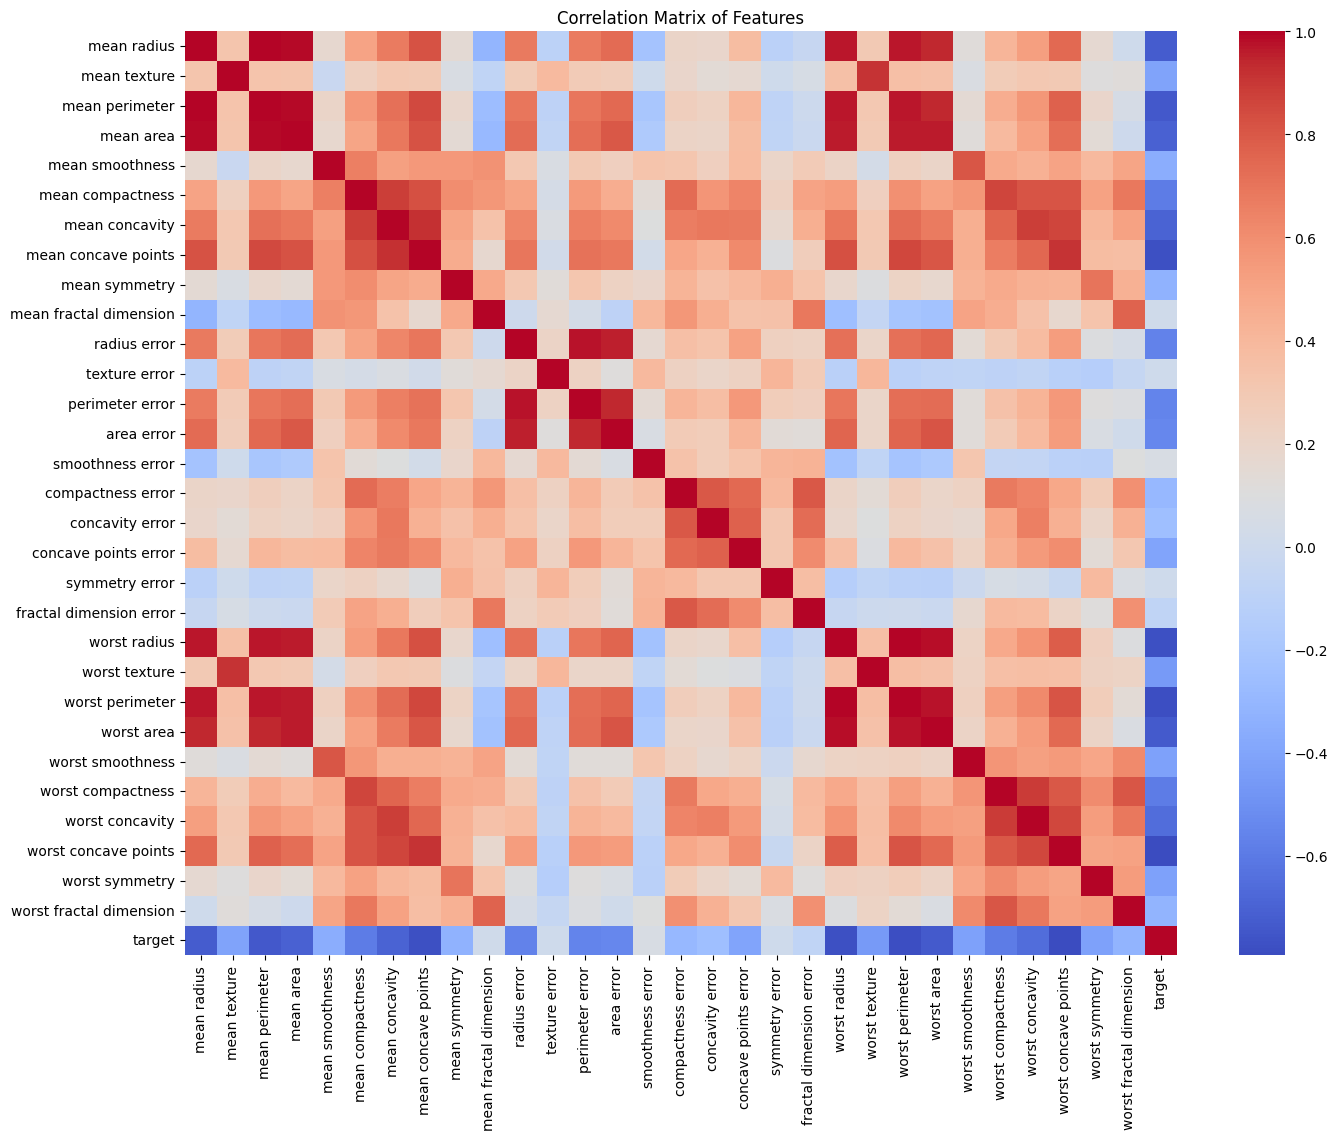

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

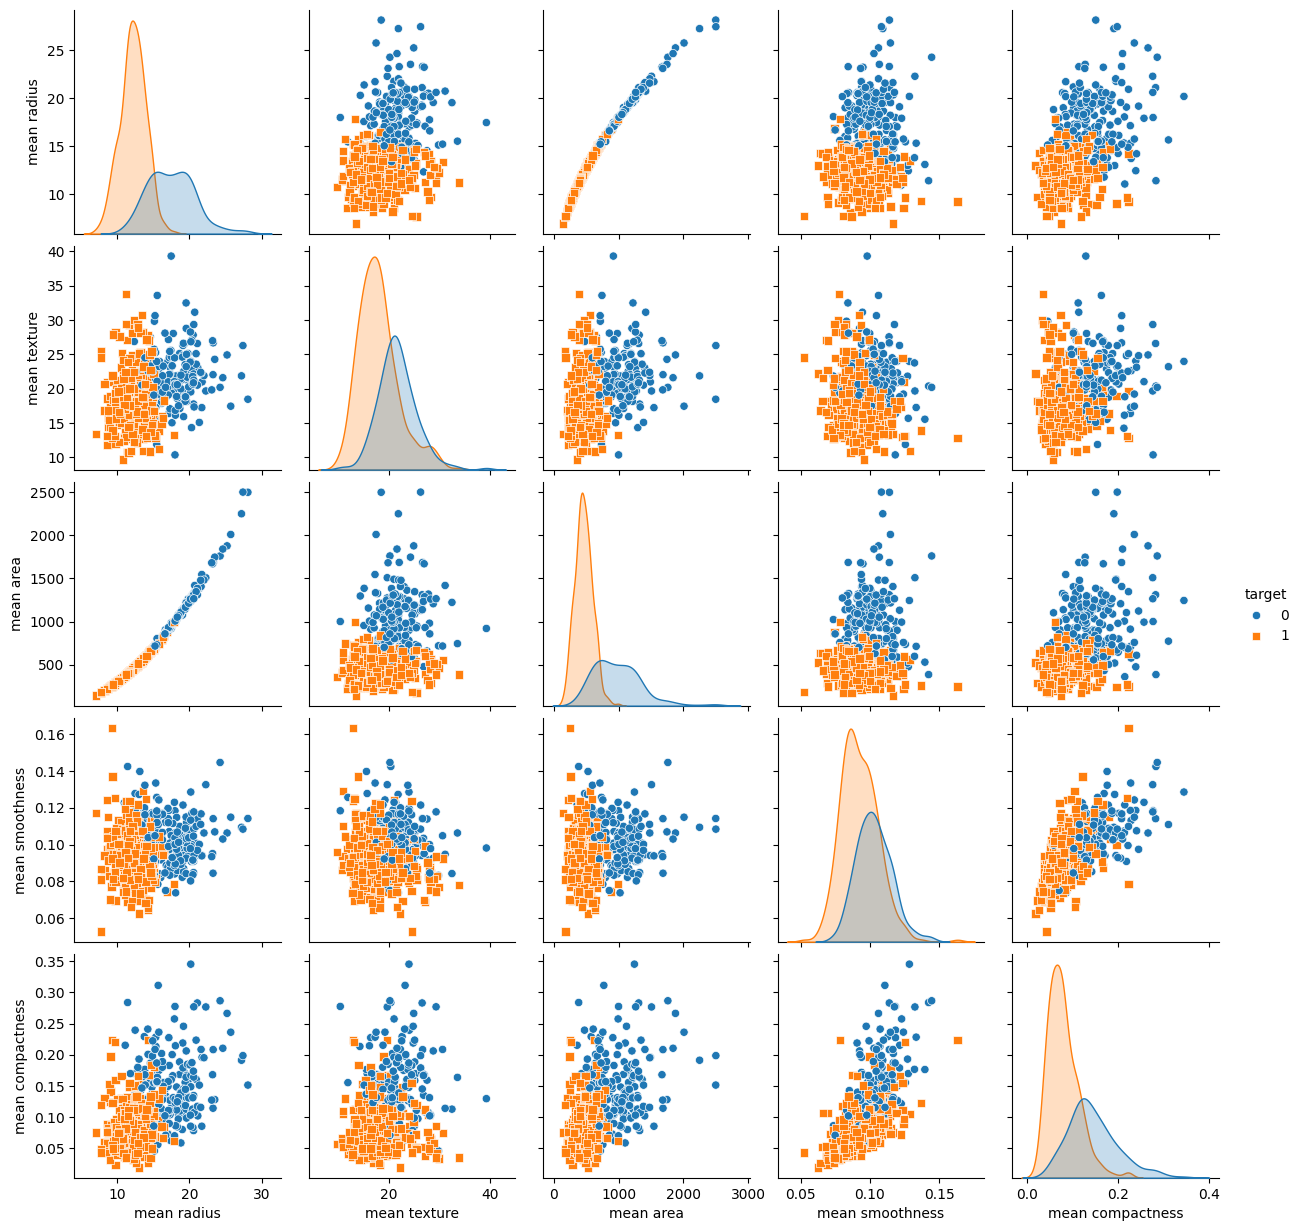

In [37]:
sel_features = ['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean compactness']

# Create a pairplot
sns.pairplot(df, vars=sel_features, hue='target', markers=['o', 's'], diag_kind='kde')
plt.show()

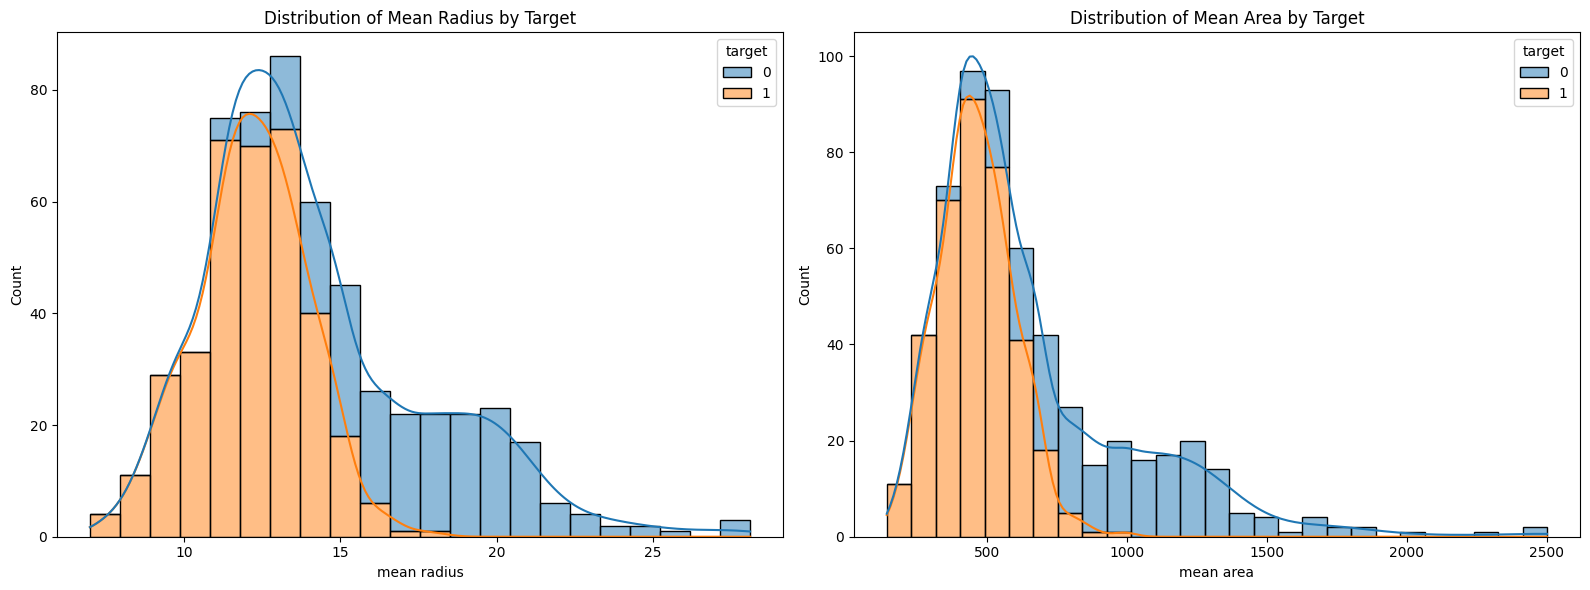

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df, x='mean radius', hue='target', kde=True, multiple="stack", ax=axes[0])
axes[0].set_title('Distribution of Mean Radius by Target')

sns.histplot(data=df, x='mean area', hue='target', kde=True, multiple="stack", ax=axes[1])
axes[1].set_title('Distribution of Mean Area by Target')

plt.tight_layout()
plt.show()

Finding Importance of Features in Detection

In [39]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

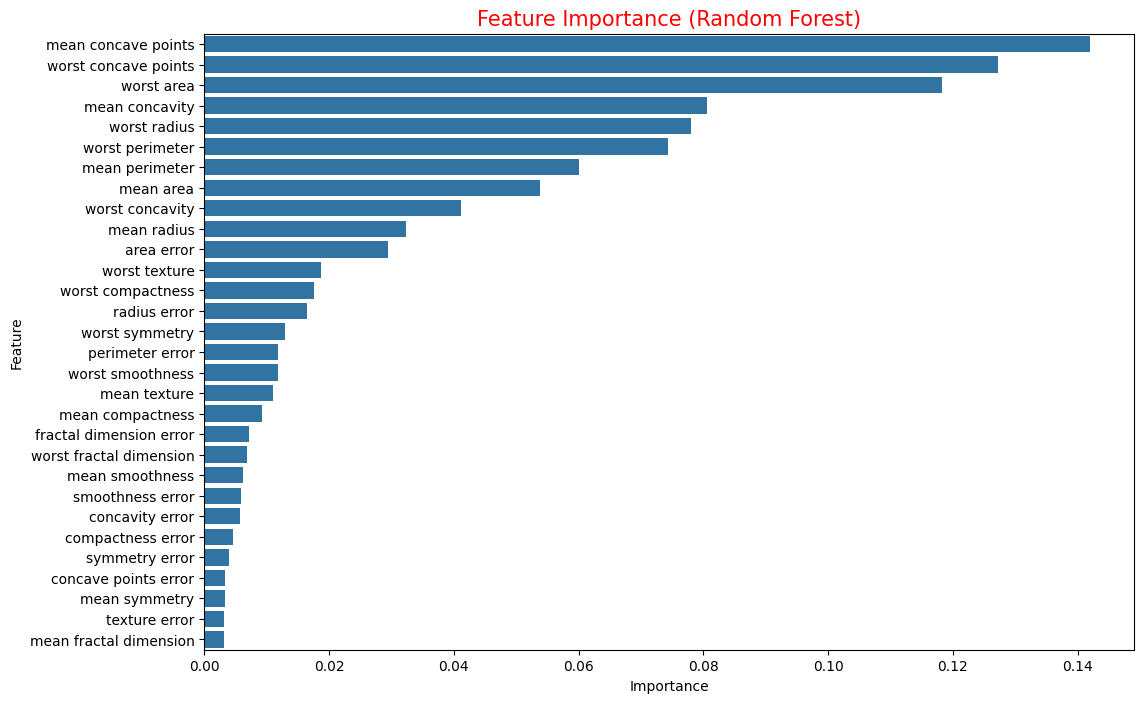

In [42]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)',size=15,color='red')
plt.show()